# 🧩 Problem Statement
The goal of this case study is to identify and analyze major customer segments for a UK-based non-store online retailer specializing in unique, all-occasion gifts. The company operates exclusively online and serves a diverse customer base, including a significant number of wholesalers. The analysis is based on a transactional dataset containing all purchases made between December 1, 2010, and December 9, 2011.

By applying data-driven techniques such as RFM (Recency, Frequency, Monetary) analysis and clustering, this project aims to uncover distinct customer profiles that reflect purchasing behavior, value contribution, and engagement patterns. These insights will help the business tailor its marketing strategies, improve customer retention, and optimize resource allocation across segments.

# Data Description:
Attribute Information:
InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal, the name of the country where each customer resides.

Dataset Link: https://drive.google.com/file/d/1nCwyLb5mTuouiigvi6sbNBT91W3MLUtF/view?usp=sharing

# Importing Necessary Libraries

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

In [267]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Online Retail.csv')

# Data Summary

In [268]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [270]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [271]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [272]:
df.shape

(541909, 8)

# Handling missing and null values in dataset

In [273]:
df.duplicated().sum()

np.int64(5268)

In [274]:
df.drop_duplicates(inplace=True)

In [275]:
df.dropna(subset = ['CustomerID'],inplace = True)

As quantity can't be in negative, I tried to check what does that negative values represent, in which I was able to find out that InvoiceNo. of those were starting from 'C', and as per observation we can conclude that these were products that were returned

In [276]:
df[df['Quantity'] < 0].head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/10 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/10 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/10 12:38,4.25,17897.0,United Kingdom


Records with return orders are deleted

In [277]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [278]:
df = df[~df['InvoiceNo'].str.startswith('C')]

Product which has 0 Unit price will most probably be free gift item, which is not helpful for our problem statement, so removed those rows too

In [279]:
df = df[df['UnitPrice'] != 0]

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


# Let us create some new features (Feature Engineering):

In [281]:
#changing data type to datetime
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'], format = "%m/%d/%y %H:%M")

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [283]:
df['day'] = df['InvoiceDate'].dt.day_name()
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day_num'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] = df['InvoiceDate'].apply(lambda x: x.minute)
df['month'] = df['InvoiceDate'].dt.month_name()

In [284]:
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']

In [285]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34


# Exploratory Data Analysis:
We will be discovering insights like:
Which products are the most and least sold ones?

Which countries has the most and least number of customers?

Distribution of the numerical features.

Which day had the most and least number of purchases?

Which month had the most and least number of purchases?

Which hour in a day had the most and least number of purchases?

# 5 Country with most number of customers

In [286]:
df_top_country= df['Country'].value_counts().reset_index().head(5)
df_top_country

,Country,count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


<Axes: xlabel='Country', ylabel='count'>

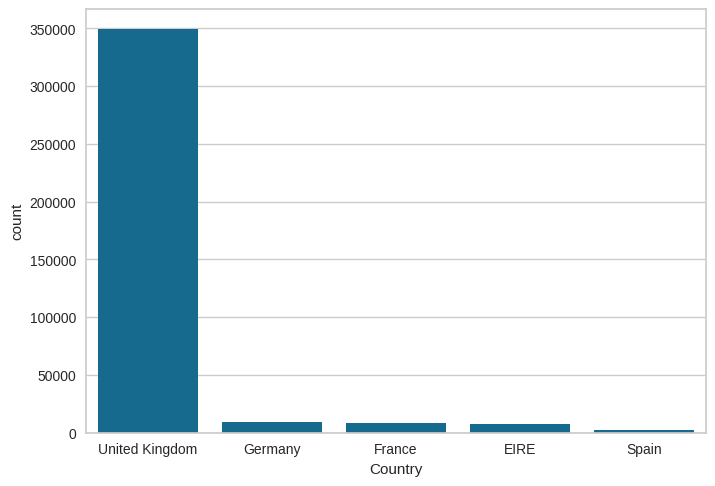

In [287]:
sns.barplot(x = 'Country', y = 'count', data = df_top_country)

# 5 Country with least number of customers

In [288]:
country_with_least_product_sold_count_df = df['Country'].value_counts().reset_index().tail(5)
country_with_least_product_sold_count_df

,Country,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


<Axes: xlabel='Country', ylabel='count'>

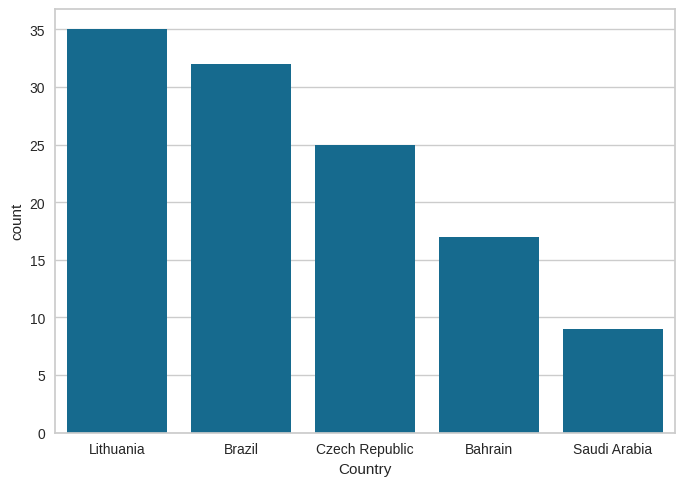

In [289]:
sns.barplot(x = 'Country', y = 'count', data = country_with_least_product_sold_count_df)

# Number of customers

In [290]:
len(df['CustomerID'].unique())

4338

# Count of orders of customers with most orders

In [291]:
df.groupby(['CustomerID'])['InvoiceNo'].count().sort_values(ascending = False).head(10)

,InvoiceNo
CustomerID,
17841.0,7676
14911.0,5670
14096.0,5111
12748.0,4412
14606.0,2677
15311.0,2366
14646.0,2076
13089.0,1814
13263.0,1667


In [292]:
order_share = df.groupby(['CustomerID'])['InvoiceNo'].count().sort_values(ascending = False).head(10).sum()/len(df['CustomerID'])

In [293]:
per_order_share = order_share * 100

# PER_ORDER_SHARE shows that 9% of the orders are done by top 10 customers

In [294]:
per_order_share

np.float64(8.939830707017205)

# Order counts by **week_days**



In [295]:
day_df = df['day'].value_counts().reset_index()
day_df.rename(columns={'day': 'Day Name'}, inplace=True)
day_df.rename(columns={'count': 'Count'}, inplace=True)
day_df

,Day Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


<Axes: xlabel='Day Name', ylabel='Count'>

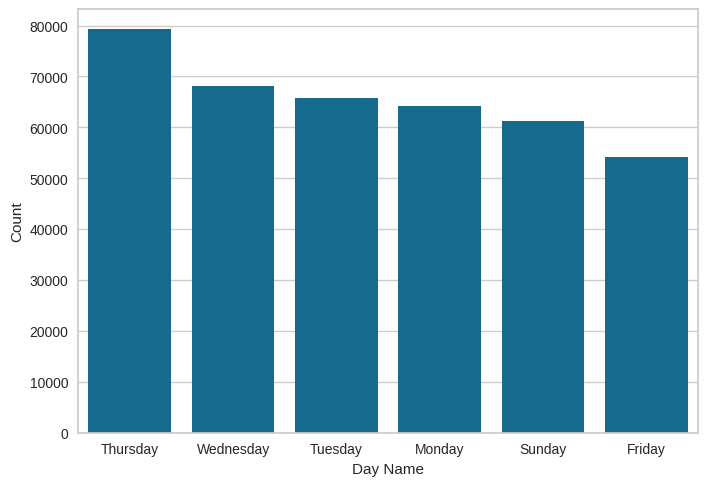

In [296]:
sns.barplot(x = 'Day Name', y = 'Count', data = day_df)

# Order counts by Month

In [297]:
month_sales_df = df['month'].value_counts().reset_index()
month_sales_df

,month,count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


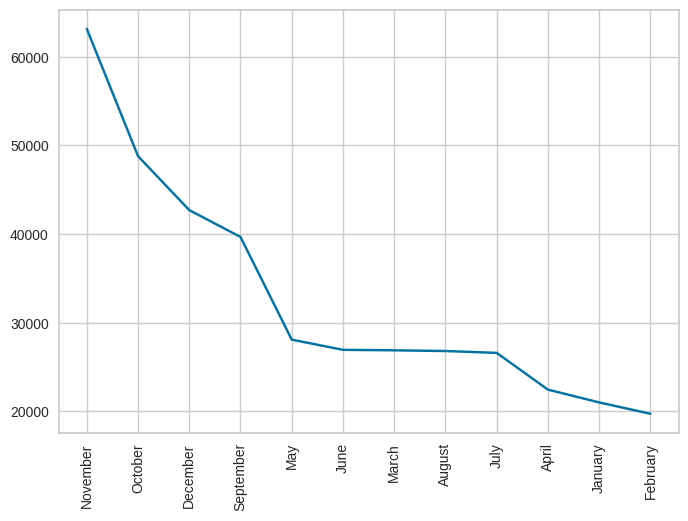

In [298]:
plt.plot(month_sales_df['month'], month_sales_df['count'])
plt.xticks(rotation=90)
plt.show()

# Data Preparation for order count by [Morning, Afternoon and Evening]

In [299]:
df['hour'].value_counts().head(7)

,count
hour,
12,70938
13,63019
14,53251
11,48365
15,44790
10,37773
16,23715


In [300]:
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

# apply the function into the column
df['time_day'] = df['hour'].apply(time_day)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,Total_Amount,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning


# Order Distribution by Time of Day

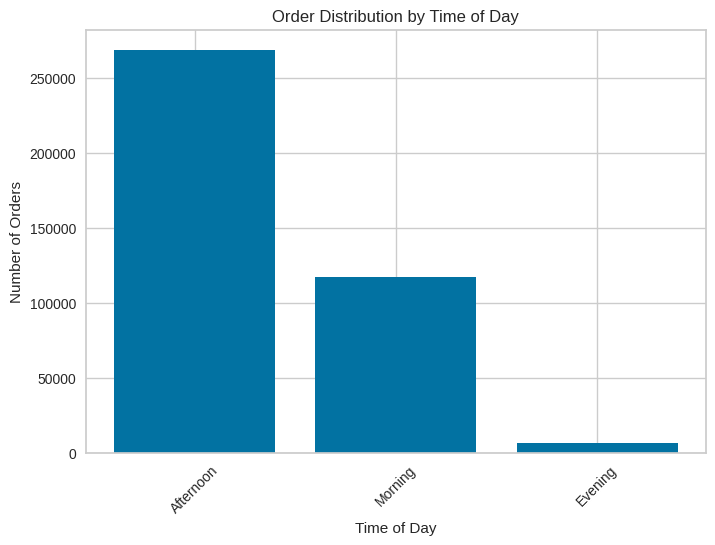

In [301]:
plt.bar(df['time_day'].value_counts().index, df['time_day'].value_counts().values)
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')
plt.title('Order Distribution by Time of Day')
plt.xticks(rotation=45)
plt.show()


## RFM Model (Recency, Frequency and Monetary):

# Filter based on Country = UK

As majority of the customers are from United Kingdom, focusing on just those customers for this strategy would be good trade-off

In [302]:
new_df = df[df['Country'] == 'United Kingdom']

In [303]:
new_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,Total_Amount,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning


In [304]:
import datetime as dt

In [305]:
# calculating RFM scores
# set latest date to '2011-12-11' as the last invoice date was '2011-12-09'
latest_date = dt.datetime(2011,12,11)

In [306]:
# create rfm modeling scores for each customer
rfm_df = new_df.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (latest_date - x.max()).days, 'InvoiceNo': lambda x : len(x.unique()), 'Total_Amount' : lambda x: x.sum()})

In [307]:
# rename columns to frequency, recency, monetary
rfm_df.rename(columns = {'InvoiceDate' : 'Recency', 'InvoiceNo' : 'Frequency', 'Total_Amount' : 'Monetary'}, inplace = True)

In [308]:
rfm_df.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12747.0,3,11,4196.01
12748.0,1,209,33053.19
12749.0,4,5,4090.88
12820.0,4,4,942.34


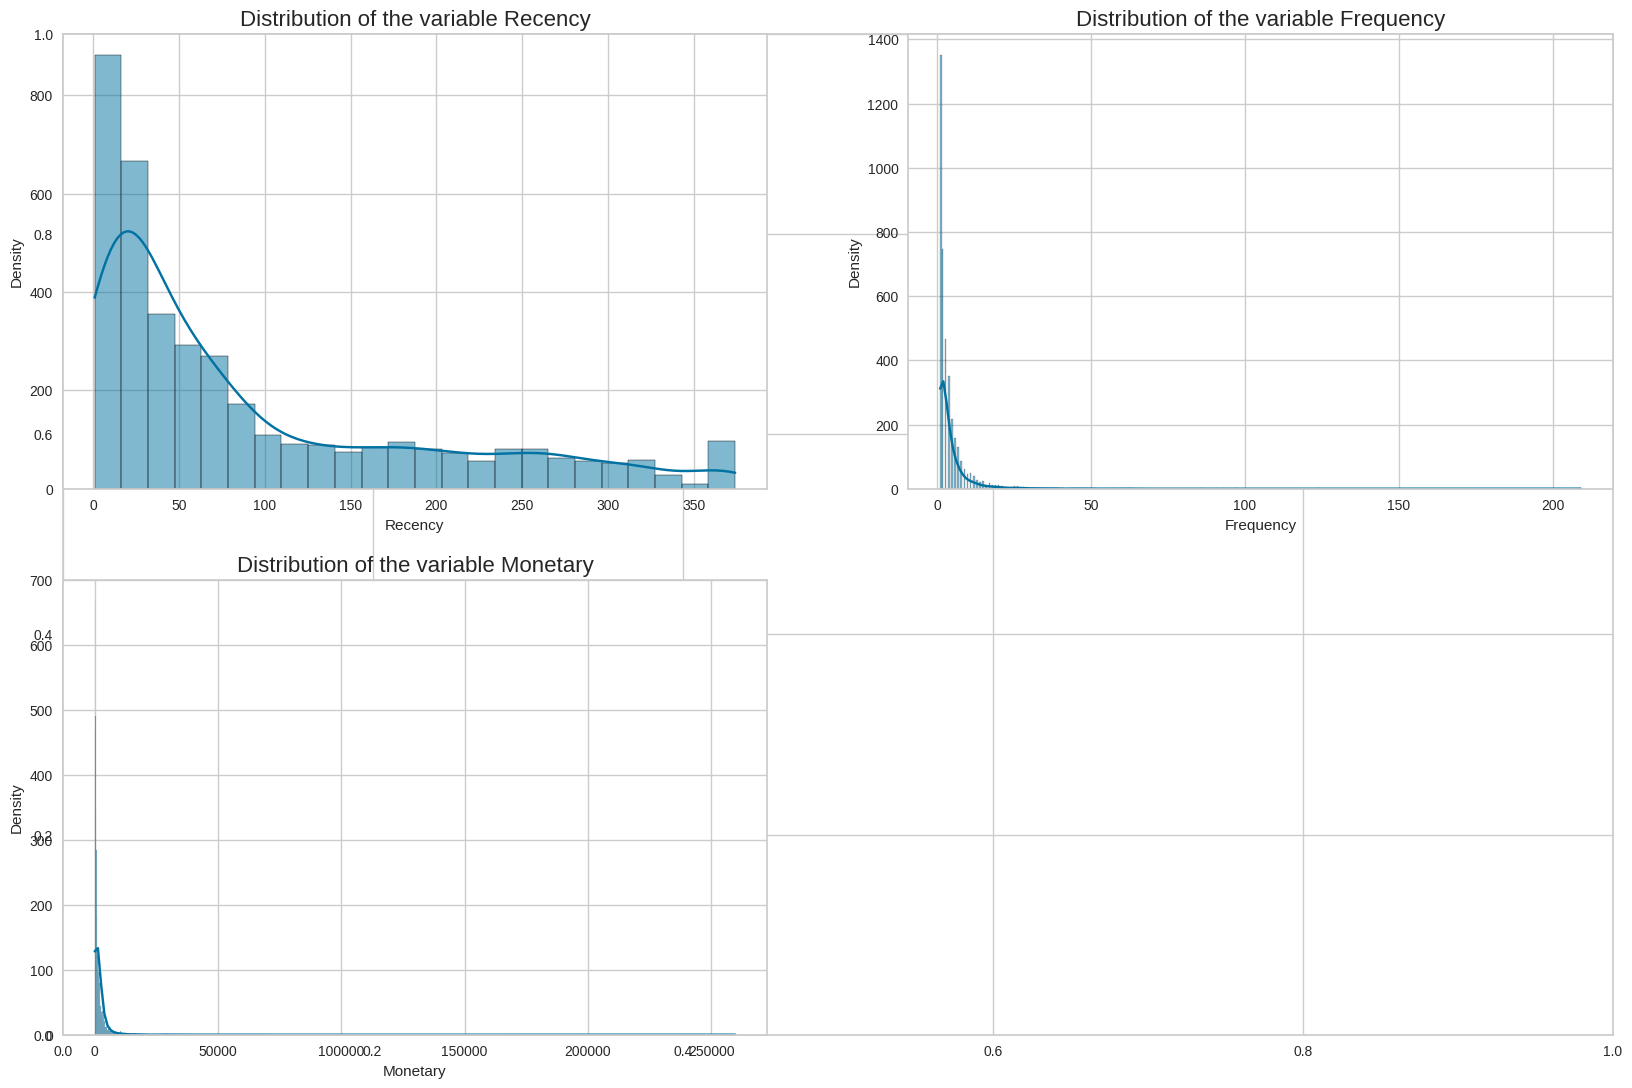

In [309]:
# plot the distribution of the RFM values
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.histplot(rfm_df[feature],kde=True)
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1
plt.show()

# Applying log transformation to the RFM values as data is highly right skewed

If the distribution is closer to normal distribution for each features it helps to better model. By applying log to each feature, skewness of the data will be reduced and will get closer to normal distribution. It also helps to reduce the impact of the outliers

In [310]:
# treat the negative and zero values to handle infinite numbers during log transformation
def handle_negative(num):
  if num <= 0:
    return 1
  else:
    return num
# apply the function to recency and monetary columns
rfm_df['Recency'] = [handle_negative(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_negative(x) for x in rfm_df['Monetary']]

In [311]:
# apply log transfomation to RFM values
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

In [312]:
log_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.787,0.000,11.254
12747.0,1.099,2.398,8.342
12748.0,0.000,5.342,10.406
12749.0,1.386,1.609,8.317
12820.0,1.386,1.386,6.848
...,...,...,...
18280.0,5.628,0.000,5.196
18281.0,5.198,0.000,4.392
18282.0,2.079,0.693,5.182


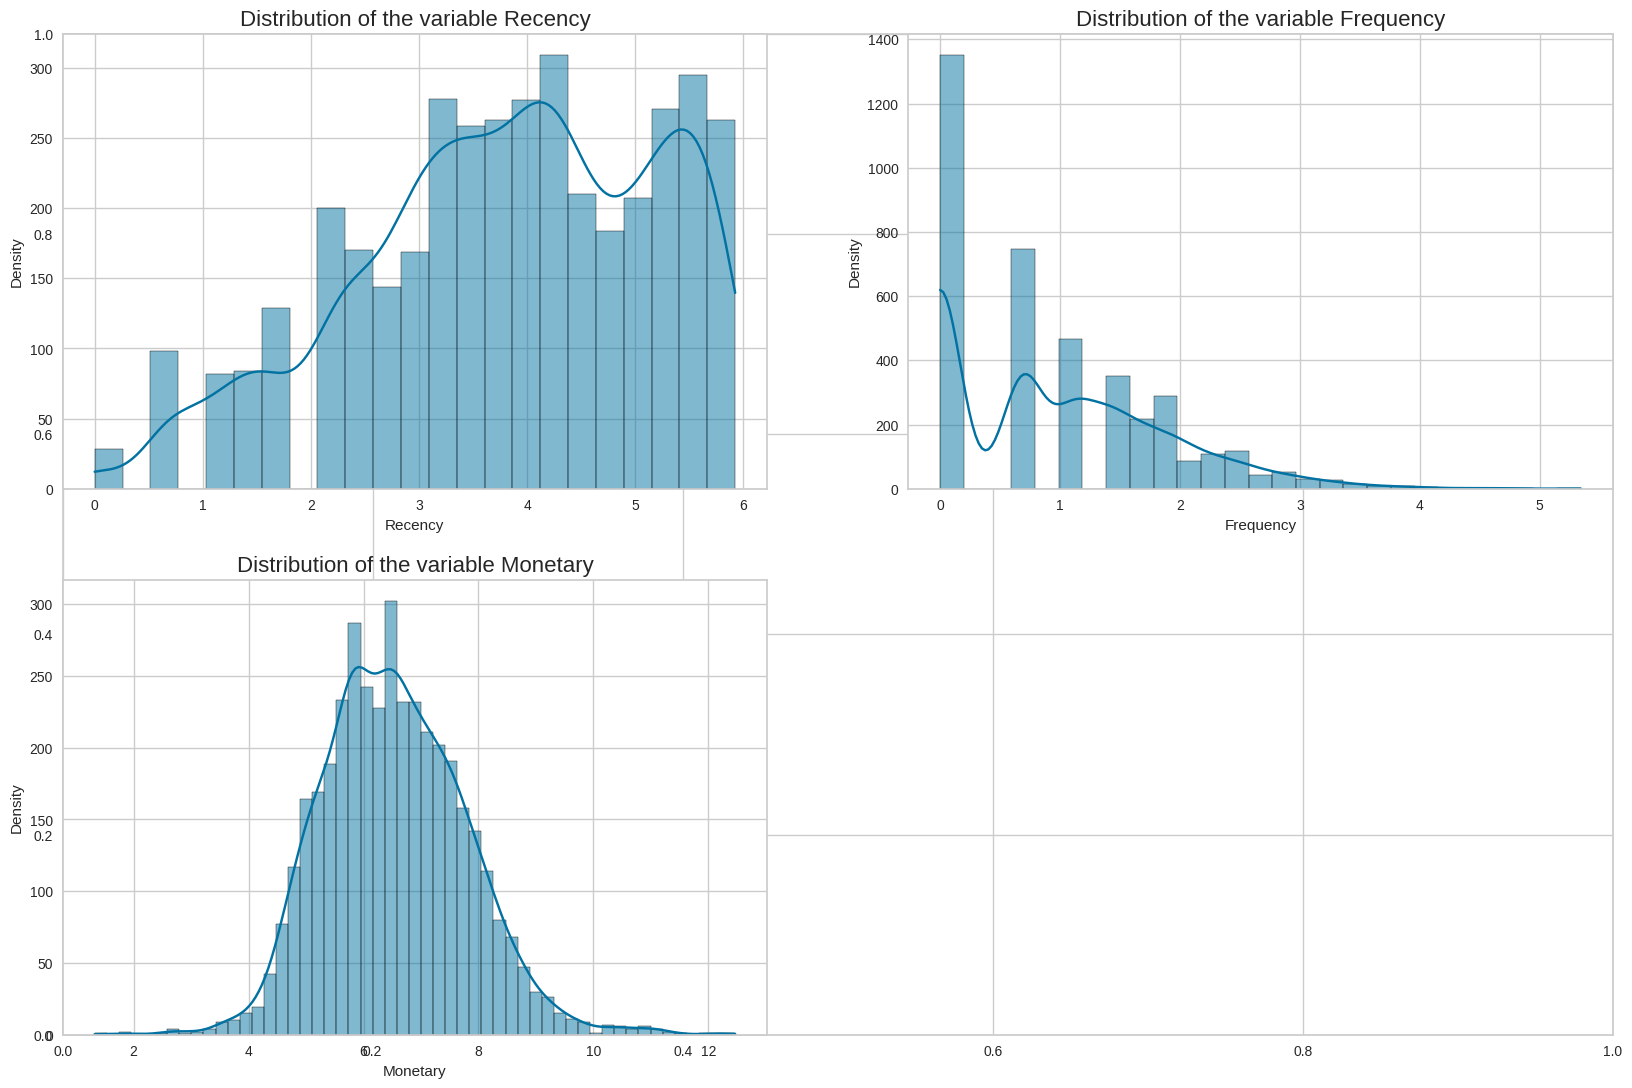

In [313]:
# plot the log transformed distribution
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.histplot(log_df[feature],kde=True)
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The distribution of Recency, Frequency and Monetary values almost looks normal now. Frequency doesn't quite look like normal distribution let's see ahead if it is working well or not

In [314]:
import math

In [315]:
# apply log transformation on the original rfm dataframe
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [316]:
rfm_df

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,326,1,77183.60,5.786897,0.000000,11.253942
12747.0,3,11,4196.01,1.098612,2.397895,8.341889
12748.0,1,209,33053.19,0.000000,5.342334,10.405873
12749.0,4,5,4090.88,1.386294,1.609438,8.316515
12820.0,4,4,942.34,1.386294,1.386294,6.848366
...,...,...,...,...,...,...
18280.0,278,1,180.60,5.627621,0.000000,5.196285
18281.0,181,1,80.82,5.198497,0.000000,4.392224
18282.0,8,2,178.05,2.079442,0.693147,5.182064


In [317]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

## Implementing K-Means Clustering:

# Applying Elbow method on Recency, Frequency and Monetary:

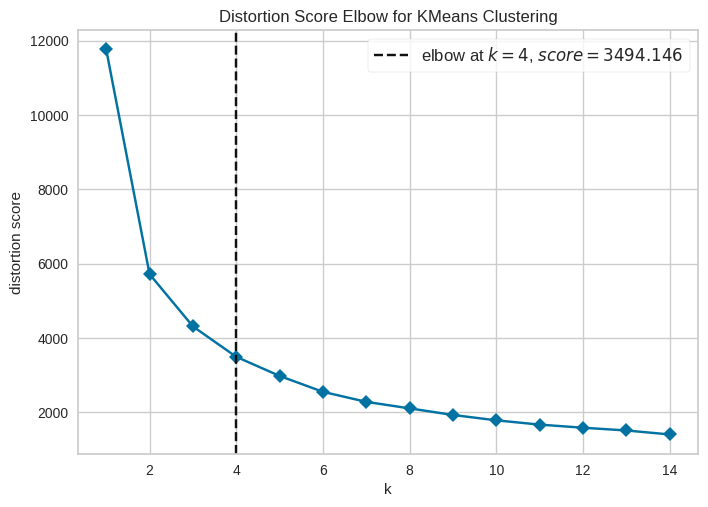

In [318]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 1000)

visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

In [319]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_km = kmeans.predict(X)


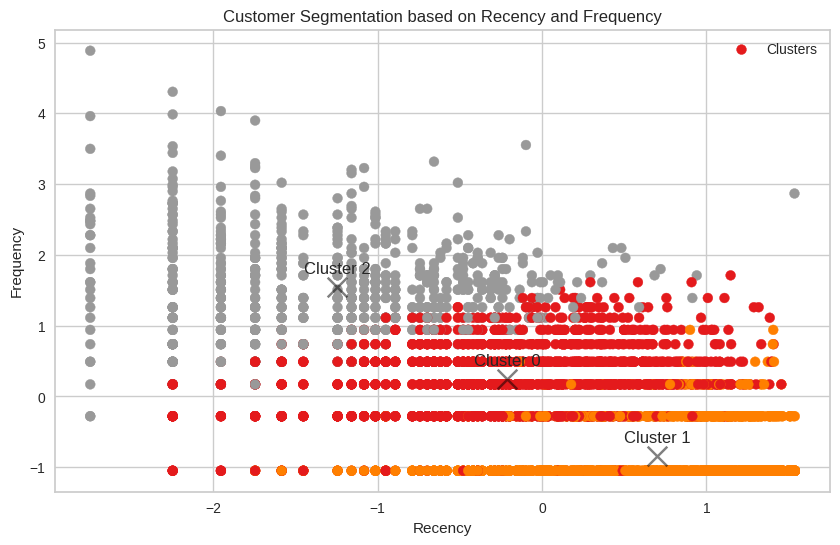

In [320]:
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Interpreting the Clusters with the help of RFM Group:

In [321]:
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 298.18500000000006,
  0.5: 644.9749999999999,
  0.75: 1571.285},
 'Recency_log': {0.25: 2.8903717578961645,
  0.5: 3.9318256327243257,
  0.75: 4.962844630259907},
 'Frequency_log': {0.25: 0.0,
  0.5: 0.6931471805599453,
  0.75: 1.6094379124341003},
 'Monetary_log': {0.25: 5.697714088709554,
  0.5: 6.469211008718629,
  0.75: 7.359648897891878}}

In [322]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [323]:
rfm_df['R'] = rfm_df['Recency'].apply(lambda x : RScore(x,'Recency',quantiles))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles ))
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,12346.0,326,1,77183.60,5.786897,0.000000,11.253942,4,4,1
1,12747.0,3,11,4196.01,1.098612,2.397895,8.341889,1,1,1
2,12748.0,1,209,33053.19,0.000000,5.342334,10.405873,1,1,1
3,12749.0,4,5,4090.88,1.386294,1.609438,8.316515,1,2,1
4,12820.0,4,4,942.34,1.386294,1.386294,6.848366,1,2,2


In [324]:
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12346.0,326,1,77183.60,5.786897,0.000000,11.253942,4,4,1,441,9
1,12747.0,3,11,4196.01,1.098612,2.397895,8.341889,1,1,1,111,3
2,12748.0,1,209,33053.19,0.000000,5.342334,10.405873,1,1,1,111,3
3,12749.0,4,5,4090.88,1.386294,1.609438,8.316515,1,2,1,121,4
4,12820.0,4,4,942.34,1.386294,1.386294,6.848366,1,2,2,122,5


In [325]:
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,
12346.0,326,1,77183.60,5.786897,0.000000,11.253942,4,4,1,441,9,0
12747.0,3,11,4196.01,1.098612,2.397895,8.341889,1,1,1,111,3,2
12748.0,1,209,33053.19,0.000000,5.342334,10.405873,1,1,1,111,3,2
12749.0,4,5,4090.88,1.386294,1.609438,8.316515,1,2,1,121,4,2
12820.0,4,4,942.34,1.386294,1.386294,6.848366,1,2,2,122,5,0


In [326]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3920 entries, 12346.0 to 18287.0
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        3920 non-null   int64  
 1   Frequency      3920 non-null   int64  
 2   Monetary       3920 non-null   float64
 3   Recency_log    3920 non-null   float64
 4   Frequency_log  3920 non-null   float64
 5   Monetary_log   3920 non-null   float64
 6   R              3920 non-null   int64  
 7   F              3920 non-null   int64  
 8   M              3920 non-null   int64  
 9   RFMGroup       3920 non-null   object 
 10  RFMScore       3920 non-null   int64  
 11  Cluster        3920 non-null   int32  
dtypes: float64(4), int32(1), int64(6), object(1)
memory usage: 382.8+ KB


In [327]:
cluster_averages = rfm_df.groupby('Cluster').mean(numeric_only=True)
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMScore
Cluster,,,,,,,,,,
0,52.011140,3.558322,1289.068187,3.508371,1.166925,6.868421,2.167104,2.212975,2.079948,6.460026
1,161.586816,1.282519,328.527717,4.765386,0.181442,5.538358,3.290759,3.725721,3.444379,10.460859
2,13.876259,13.002878,6848.543885,2.073287,2.327133,8.254461,1.246043,1.133813,1.113669,3.493525


### **Interpretation:**

1. **Cluster 0**:
   - **Recency**: High (average around 158 days)
   - **Frequency**: Low (average around 1.3 transactions)
   - **Monetary**: Low (average around $320)
   - **Interpretation**: Customers in this cluster are likely to be 'At-Risk' or 'Lapsed' customers. They haven't made purchases recently, and when they did, they didn't do so very frequently and didn't spend much. These customers might have been one-time buyers or occasional shoppers. Engaging them with reactivation campaigns or exploring why they haven’t returned can be a strategic move.

2. **Cluster 1**:
   - **Recency**: Very Low (average around 12 days)
   - **Frequency**: Very High (average around 13 transactions)
   - **Monetary**: Very High (average around $6722)
   - **Interpretation**: This cluster represents your 'Champions' or 'Loyal' customers. They shop frequently, recently, and spend the most. They are the most valuable segment, likely to respond positively to new offers, up-sell and cross-sell opportunities. Maintaining their high engagement level is crucial, and they can also be targeted for feedback or as brand ambassadors.

3. **Cluster 2**:
   - **Recency**: Moderate (average around 54 days)
   - **Frequency**: Moderate (average around 3 transactions)
   - **Monetary**: Moderate (average around $1306)
   - **Interpretation**: Customers in this cluster can be seen as 'Potential Loyalists' or 'Promising' customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if properly engaged. Tailored marketing strategies, loyalty programs, and incentives to increase their purchase frequency and value can be effective.

**Overall Strategy**:
- **Cluster 0 ('At-Risk/Lapsed')**: Focus on re-engagement strategies. Understand their needs and reasons for not returning. Offer incentives or feedback surveys to encourage them to revisit and make purchases.
- **Cluster 1 ('Champions/Loyal')**: Prioritize maintaining their high level of engagement. Offer exclusive deals, loyalty programs, and early access to new products. They can also be engaged in referral programs.
- **Cluster 2 ('Potential Loyalists/Promising')**: Encourage them to visit and buy more often. Personalized communication, recommending products based on past purchases, and loyalty rewards can be effective.